# **The Sparks Foundation** 

# **Task 6: Prediction using Decision Tree Algorithm**

## **Kartikey Prohit**

Objective: To predict the species of iris flower on the iris dataset when we feed any new data to this classifier using Decision Tree Classifier. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Data Exploration

In [2]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\Iris (1).csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.shape

(150, 6)

In [6]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df1= df.drop_duplicates(subset="Species",)
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [9]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Plotting

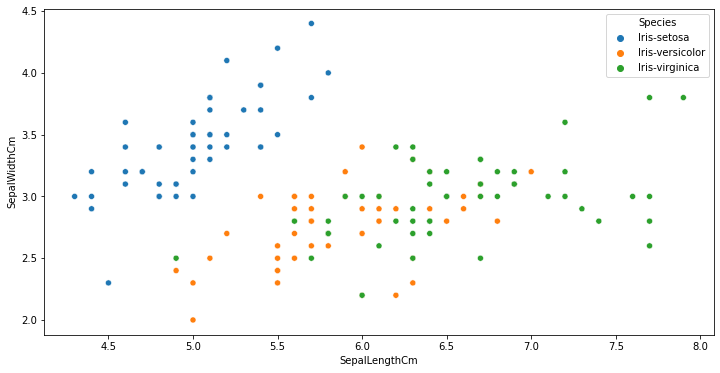

In [10]:
plt.figure(figsize=[12,6])
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",hue="Species",data=df)
plt.show()

From the above graph, we can see that 


* Iris-setosa has smaller sepal length but higher width
* Iris-versicolor lies in almost middle for sepal length as well as sepal width
* Iris-virginica has larger sepal length and smaller sepal width


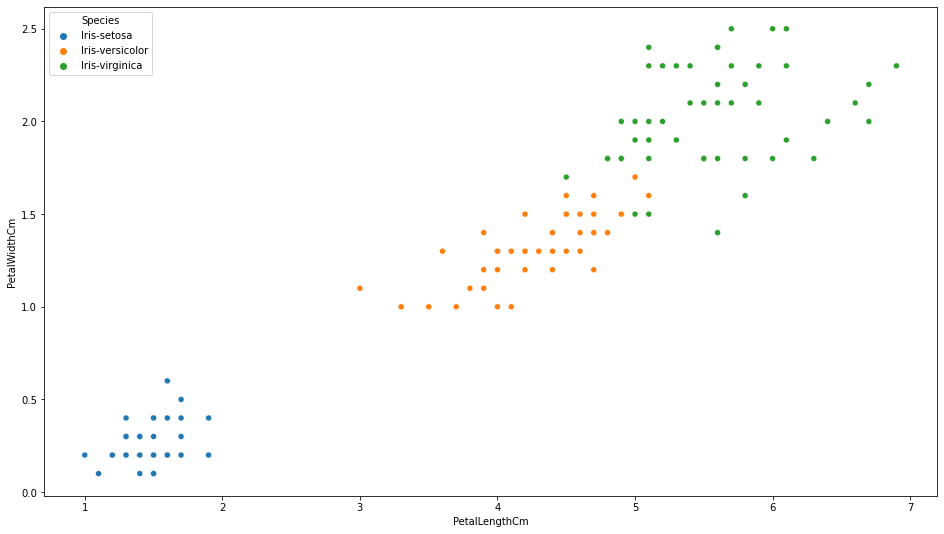

In [11]:
plt.figure(figsize=(16,9))
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",hue="Species",data=df)
plt.show()

From the above graph, we can see that

* Iris-setosa has the smaller petal length as well as petal width
* Iris-versicolor has average petal length and petal width
* Iris-virginica has the highest petal length as well as petal width


<Figure size 1008x720 with 0 Axes>

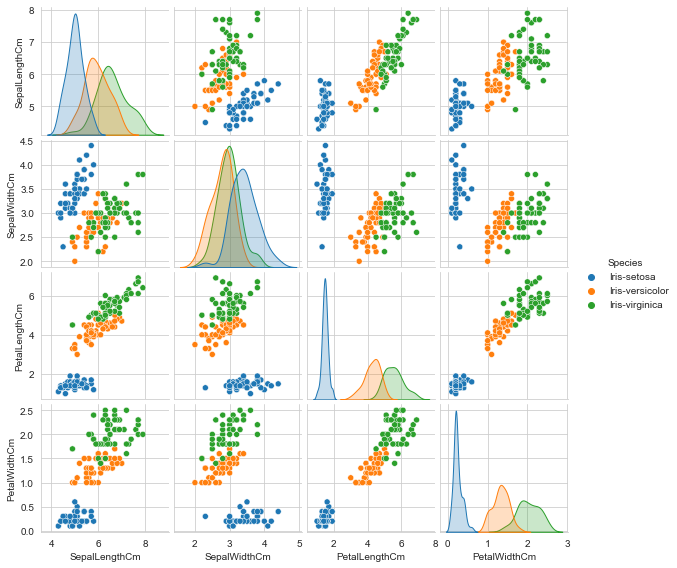

In [12]:

plt.figure(figsize=(14,10))
sns.set_style("whitegrid")
sns.pairplot(df.drop(["Id"], axis=1),hue="Species",height=2)
plt.show()


From the above plots, we can observe that

* Iris-setosa has the smallest of petals width and lendth. It also has the smallest sepal length but larger sepal widths

<AxesSubplot:>

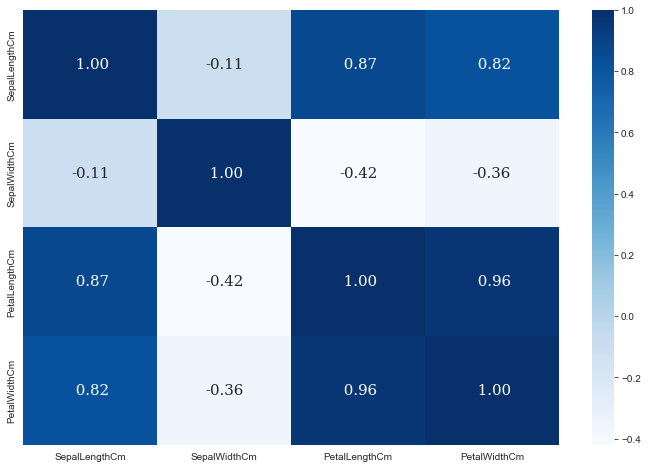

In [13]:
# Heat-map
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().drop(["Id"],axis=1).drop(["Id"],axis=0),annot=True,annot_kws={"fontsize":15,"fontfamily":"serif"},fmt=" .2f",cmap="Blues")

From the above graph, we can observe that

* Petal width and petal length features are highly correlated with each other
* Sepal width and sepal length features are slightly correlated with each other

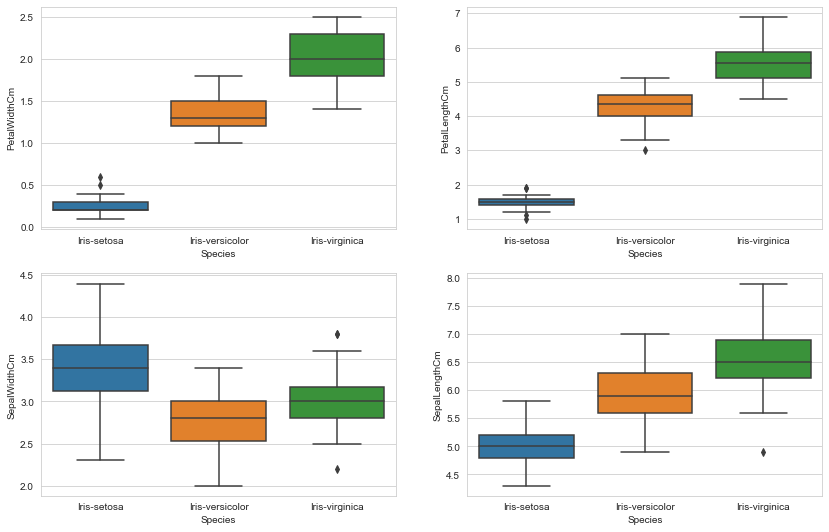

In [14]:
fig, axes = plt.subplots(2,2,figsize=(14,9))
sns.boxplot(x="Species",y="PetalWidthCm",data=df,ax=axes[0,0])
sns.boxplot(x="Species",y="PetalLengthCm",data=df,ax=axes[0,1])
sns.boxplot(x="Species",y="SepalWidthCm",data=df,ax=axes[1,0])
sns.boxplot(x="Species",y="SepalLengthCm",data=df,ax=axes[1,1])
plt.show()

From the above plots, we can observe that

* Iris-setosa has the smaller feature and less distributed with some outliers
* Iris-versicolor is distributed and has the average feature
* Iris-viginica has largest feature and highly distributed

## **Split the Data**

In [15]:
# make function to encode categorical data to numeric

def enc(a):
    if a == "Iris-setosa":
        return 1
    elif a == "Iris-versicolor":
        return 2
    else:
        return 3
    
# add a column "target" to encoding categorical data from species column based on above function

df["target"] = df.apply(lambda row: enc(row["Species"]),axis=1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [16]:
# storing data and target in X and y respectively
X = df.drop(["Species"],axis=1)
X = X.to_numpy()[: , (1,2,3,4)]
y = df["target"]
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2)

Train test split model is a model validation procedure that reavels how our model performs on new data. 
In this model, we split the data with 80% of dataset goes into the training set and 20% of the datadet goes into the testing set.

## Performing Classification

In [17]:
# creating decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print("Training Complete!")

Training Complete!


## Visualization

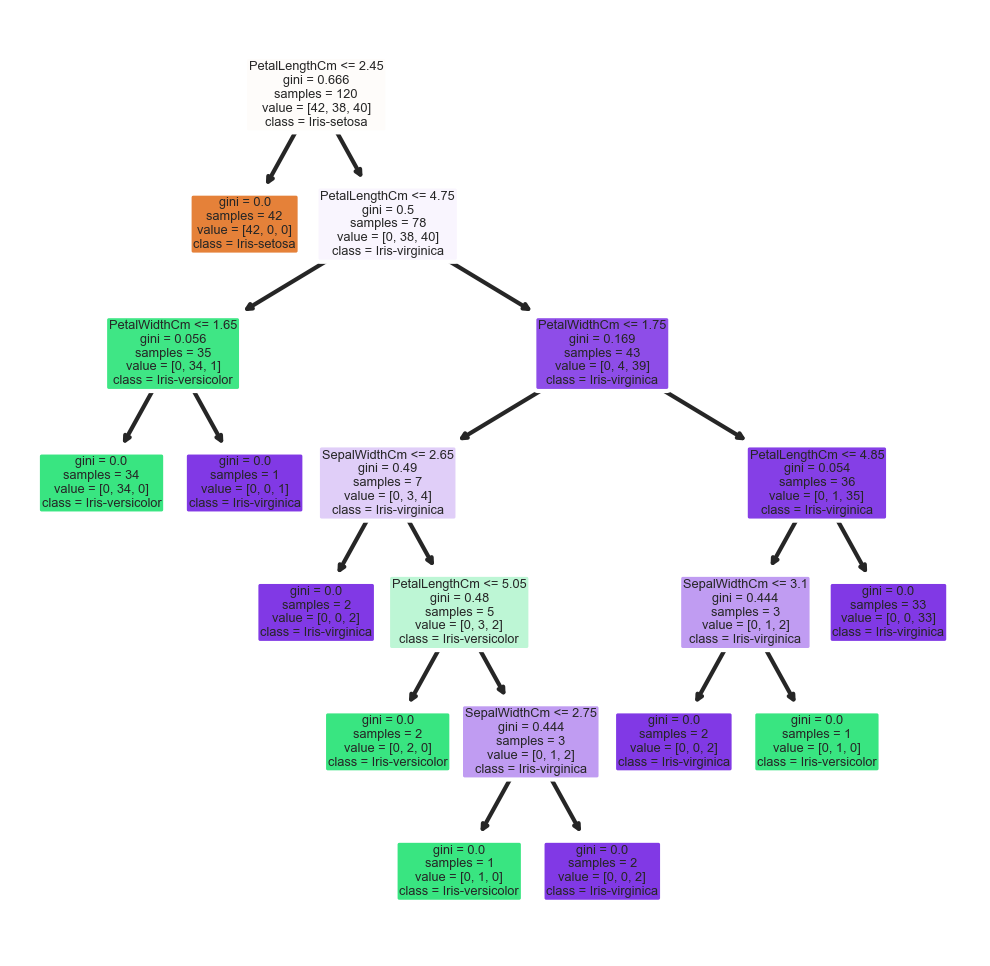

In [18]:
fn = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn = ['Iris-setosa','Iris-versicolor','Iris-virginica']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)

tree.plot_tree( dtc,
               feature_names = fn,
               class_names = cn,
               filled = True,
               rounded = True);

fig.savefig('DecisionTree.png')

## Testing Performance

In [19]:
y_pred = dtc.predict(X_test)

In [20]:
print(confusion_matrix(y_test,y_pred))

[[ 8  0  0]
 [ 0 11  1]
 [ 0  0 10]]


A confusion marix is used to describe the performance of a classification model on a set of test data for which the true values are known.

In [21]:
# predict accuracy score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      0.92      0.96        12
           3       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Result

* Accuracy value of 97% means that idendification of 97 of every 100 flowers is correct, and 3 are incorrect.